# Cvičení 7

## Metoda sdružených gradientů

V první části tohoto cvičení otestujeme metodu sdružených gradientů (CG). CG je gradientní iterační metoda, která vytváří posloupnost A-ortogonálních (sdružených) vektorů. Nový vektor je z předchozích určen pomocí postupu založeného na Gramově-Schmidtově ortogonalizaci. Využijte pseudokód z přednášky.

In [28]:
# ÚKOL: Doplňte chybějící kód ve while cyklu metody sdružených gradientů

import numpy as np

def conjugate_gradients2(A, b, x0, tol, maxIt):
    """
    Resi system Ax=b s SPD matici A pomoci metody sdruzenych gradientu.
    A: matice soustavy
    b: vektor prave strany
    x0: pocatecni odhad
    tol: relativni presnost
    max_it: maximalni pocet iteraci
    """
    
    # citac iteraci
    k = 0

    # vektor pocatecniho rezidua a pocatecniho smeru
    x = x0
    r = b - np.dot(A, x)
    d = r

    # promenna pro ukladani r_{k+1}'*r_{k+1}
    delta_new = np.dot(r.T, r)
    # promenna pro ukladani r_{k}'*r_{k}
    delta_old = 0

    # pro vypocet ukoncovaci podminky
    r_init = np.linalg.norm(b - np.dot(A, x0))

    residua = []

    # main loop
    while k < maxIt and (np.linalg.norm(b - np.dot(A, x)) / r_init > tol):
        #  vypoctete alpha_k, x_{k+1} and r_{k+1}:
        alpha_k = (r.T @ r)/(d.T @ A @ d)
        x = x + alpha_k * d
        r = r - (alpha_k * (A @ d))
        # vypoctete beta_k, d_{k+1}:
        delta_old = delta_new
        delta_new = np.dot(r.T, r)
        beta_k = (r.T @ r)/(delta_old)
        d = r + (beta_k * d)
        # inkrementujeme citac iteraci
        k += 1
        residua.append(np.linalg.norm(r))
    res = np.array(residua)
    return x, k, res

In [16]:
# Otestujeme vasi metodu

n = 100
U = np.triu(np.random.rand(n, n), 1)
d = 100 * np.random.rand(n, 1)
A = np.diag(d.flatten()) + U + U.T  # matice soustavy
b = np.random.rand(n, 1)            # vektor prave strany
x0 = np.zeros((n, 1))               # pocatecni odhad reseni

x, k = conjugate_gradients(A, b, x0, 1e-8, 100)
x_np = np.linalg.solve(A, b)
print("Pocet iteraci: {}".format(k))
print("||x - x_np|| = {}".format(np.linalg.norm(x - x_np)))

Pocet iteraci: 56
||x - x_np|| = 2.22970753715118e-09


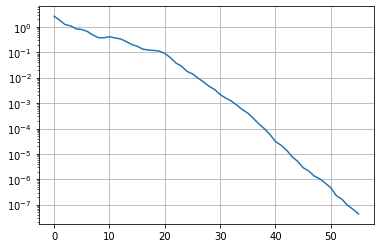

In [29]:
# UKOL: pravte metodu tak, aby vracela vektor residuals, na jehoz konec v kazde 
# iteraci ulozite aktualni normu rezidua.
# Pote pomoci knihovny matplotlib vykreslete graf normy rezidua v zavislosti na iteraci.
#
# Graf by mel obsahovat: Nadpis (title), popisky os, mrizku (grid)
#
# Pro lepsi prehlednost se pokuste graf vykreslit take s logaritmickou skalou na ose y.
import matplotlib.pyplot as plt
x, k, res = conjugate_gradients2(A, b, x0, 1e-8, 100)
ka = np.arange(k)
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.grid()
ax.plot(ka, res)


## Householderovy transformace, QR rozklad

QR rozklad převádí matici $\mathsf{A}$ na součin ortogonální a horní trojúhelníkové matice. Jedním ze způsobů, jak toho dosáhnout, je pomocí Householderových transformací. V následující části cvičení se tedy zaměříme na jejich využití při nulování prvků nějakého daného vektoru.

Připomeňme, že Householderovu matici $\mathsf{P}$, která daný vektor $\mathbf{x}$ projektuje na vektor $\mathsf{P}\mathbf{x}=(\|\mathbf{x}\|, 0, 0, \ldots, 0)^T$ získáme jako
$$
\mathsf{P} = \mathsf{I} - 2\frac{\mathbf{v}\mathbf{v}^T}{\mathbf{v}^T\mathbf{v}},
$$
kde pro vektor $\mathbf{v}$ platí $\mathbf{v} = -\mathrm{sign}(x_1)\|\mathbf{x}\|\mathbf{e}_1-\mathbf{x}$.

Nejprve tedy vytvoříme pomocnou funkci `householder`, která pro vstupní vektor `x` vygeneruje Householderovu matici nulující druhý až poslední prvek.

In [109]:
import numpy as np

def householder(x):
    """
    Vrátí matici Householderovy transformace, která vynuluje prvky na druhé až 
    poslední pozici vstupního vektoru.
    x: input vector
    P: matice zrcadlení (Householderova matice)
    """

    # UKOL: Doplnte kod funkce householder.
    # Potrebujete:
    # 1. urcit delku vektoru x
    # 2. sestavit vektor e_1 = (1, 0, 0, ..., 0) odpovidajici delky  
    # 3. sestavit vektor v
    # 4. pomoci nej sestavit matici P a vratit ji

    x_len = len(x)
    e_1 = np.zeros((x_len, 1))
    e_1[0] = 1
    v = (-np.sign(x[0]) * np.linalg.norm(x) * e_1) - x

    P = np.eye(x_len) - 2 * ((v @ v.reshape((1, x_len))) / (v.reshape((1, x_len)) @ v))

    return P
    
    

In [110]:
# UKOL: Otestujte vasi metodu. Vytvorte nahodny sloupcovy vektor, matici P
# a ujistete se, ze po aplikaci matice na vektor ziskate vektor odpovidajicich vlastnosti
# (tzn. ve tvaru (||x||, 0, 0, ..., 0) )

v = np.random.rand(5, 1)
P = householder(v)
Pv = P@v
print(Pv)
print(np.linalg.norm(v))
print(np.linalg.norm(Pv))

[[-1.38190191e+00]
 [ 1.28418223e-16]
 [ 1.66377995e-17]
 [ 1.58869438e-16]
 [ 2.20766015e-16]]
1.3819019139595539
1.3819019139595534


# Domácí úkol č. 5

Doplňte následující kód funkce `my_qr`, která implementuje QR rozklad s použitím Householderovy transformace. Vyjděte z pseudokódu poskytnutého v přednáškách, ale modifikujte kód tak, aby využíval vámi vytvořenou metodu `householder` k výpočtu transformační matice.

Nezapomeňte, že před aplikací musíte transformační matici umístit na vhodnou pozici v jednotkové matici, aby modifikovala pouze odpovídající prvky daného sloupce.

In [115]:
def my_qr(A):
    """
    Funkce vrátí QR rozklad čtvercové matice A
    
    A: Vstupní matice
    vraci Tuple (Q, R), kde Q je ortogonální matice a R je horní trojúhelníková matice
    """
   
    m, n = A.shape
    if m != n:
        raise ValueError("Matice neni ctvercova!")

    Q = np.eye(m)
    R = A.copy()

    for j in range(m):
        x = R[j:m,[j]]
        x = np.array(x)
        P = householder(x)
        E = np.eye(m)
        E[j:m, j:m] = P
        R = E @ R
        Q = Q @ E
    # doplnte cyklus pres sloupce
    # pro prislusnou cast aktualniho sloupce i sestavte transformacni matici P,
    # updatujte R a Q
        

    return Q, R

In [116]:
# Otestujte vasi implementaci na malem prikladu:

A = np.random.rand(5, 5)
print(A)

Q, R = my_qr(A)
# A se musi rovnat QR
print(Q@R)
print(A-Q@R)

[[0.20605536 0.73380426 0.94557151 0.57920575 0.06475263]
 [0.51339266 0.48163887 0.80234705 0.3654812  0.7645603 ]
 [0.51424817 0.48642645 0.54716414 0.12506495 0.47015953]
 [0.57721768 0.4875988  0.14344344 0.71034494 0.79112107]
 [0.69217105 0.4401035  0.1848537  0.70281227 0.23420889]]
[[0.20605536 0.73380426 0.94557151 0.57920575 0.06475263]
 [0.51339266 0.48163887 0.80234705 0.3654812  0.7645603 ]
 [0.51424817 0.48642645 0.54716414 0.12506495 0.47015953]
 [0.57721768 0.4875988  0.14344344 0.71034494 0.79112107]
 [0.69217105 0.4401035  0.1848537  0.70281227 0.23420889]]
[[-2.77555756e-17  0.00000000e+00  1.11022302e-16  1.11022302e-16
  -5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  1.11022302e-16 -1.11022302e-16
   2.22044605e-16]
 [ 1.11022302e-16  0.00000000e+00  1.11022302e-16 -3.33066907e-16
   5.55111512e-17]
 [ 1.11022302e-16  1.11022302e-16 -1.38777878e-16  1.11022302e-16
  -1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.5511151